<a href="https://colab.research.google.com/github/miguel-fc/PyTorch-tools/blob/main/read_data_nr_vfp49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import gdown
# import torch

In [2]:
#Import tar.gz file with all the sld plots and labels
# !gdown "https://drive.google.com/uc?id=1Q9PX_3XUpYpYNtSMjNa0VD50qJQaujLl"
!gdown "https://drive.google.com/uc?id=1XojUTuKoOquLhx4M0Be3N1YgIXO3BlAj"

Downloading...
From: https://drive.google.com/uc?id=1XojUTuKoOquLhx4M0Be3N1YgIXO3BlAj
To: /content/m-all_sld_data_fp49.tar.gz
100% 6.10M/6.10M [00:00<00:00, 30.3MB/s]


In [3]:
#Unzip and untar
# !gunzip /content/all_sld_data_fp34.tar.gz
# !tar -xvf /content/all_sld_data_fp34.tar

!gunzip /content/m-all_sld_data_fp49.tar.gz
!tar -xvf /content/m-all_sld_data_fp49.tar


Streaming output truncated to the last 5000 lines.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
m-all_sld_data_fp49/sld_run_3213.dat
m-all_sld_data_fp49/._params_9803.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
m-all_sld_data_fp49/params_9803.dat
m-all_sld_data_fp49/._params_3490.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
m-all_sld_data_fp49/params_3490.dat
m-all_sld_data_fp49/._sld_run_7075.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
m-all_sld_data_fp49/sld_run_7075.dat
m-all_sld_data_fp49/._params_2956.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
m-all_sld_data_fp49/params_2956.dat
m-all_sld_data_fp49/._sld_run_1404.dat
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
m-all_sld_data_fp49/sld_run_1404.dat
m-all_sld_data_fp49/._params_3484.dat
ta

In [4]:
#Accessing the directory, removing some no needed files
# !cd /content/all_sld_data_fp34/random_initial_guess/ 
!cd /content/m-all_sld_data_fp49
!rm ._*

In [5]:
#Functions to read the sld and the param files
def read_sld_files(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        y = []
        xy = [x,y]
        for line in data:
            p = line.split()
            # print(p)
            x.append(float(p[0]))
            y.append(float(p[1]))
            xy = x,y
            # array_xy = np.asarray(xy)

    return np.asarray(x),np.asarray(y)


def read_params_files(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        # y = []
        for line in data:
            # print(line)
            p = line.split()
            # print(p)
            x.append(p[3])

    return x

In [6]:
#Creating a dictionary with sld and parameter files
sld_dict = {}
params_dict = {}

# folder = '/content/all_sld_data_fp34/random_initial_guess/'
folder = '/content/m-all_sld_data_fp49'


datafiles = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().startswith('sld')]

for file in datafiles:
  dataindiv = read_sld_files(file)
  sld_dict[file] = dataindiv


# folder = '/content/all_sld_data_fp34/random_initial_guess/'
folder = '/content/m-all_sld_data_fp49/'


datafiles = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().startswith('p')]

for file in datafiles:
  dataindiv = read_params_files(file)
  params_dict[file] = dataindiv

Streaming output truncated to the last 5000 lines.
/content/m-all_sld_data_fp49/params_8614.dat
/content/m-all_sld_data_fp49/params_8704.dat
/content/m-all_sld_data_fp49/params_18.dat
/content/m-all_sld_data_fp49/params_3025.dat
/content/m-all_sld_data_fp49/params_872.dat
/content/m-all_sld_data_fp49/params_7366.dat
/content/m-all_sld_data_fp49/params_8541.dat
/content/m-all_sld_data_fp49/params_9015.dat
/content/m-all_sld_data_fp49/params_3457.dat
/content/m-all_sld_data_fp49/params_695.dat
/content/m-all_sld_data_fp49/params_9585.dat
/content/m-all_sld_data_fp49/params_2233.dat
/content/m-all_sld_data_fp49/params_6737.dat
/content/m-all_sld_data_fp49/params_6155.dat
/content/m-all_sld_data_fp49/params_8860.dat
/content/m-all_sld_data_fp49/params_7621.dat
/content/m-all_sld_data_fp49/params_9196.dat
/content/m-all_sld_data_fp49/params_3270.dat
/content/m-all_sld_data_fp49/params_144.dat
/content/m-all_sld_data_fp49/params_8456.dat
/content/m-all_sld_data_fp49/params_9950.dat
/content/

In [7]:
#Checking the original lenghts of these two dictionaries
len(sld_dict), len(params_dict)

(6602, 9050)

In [8]:
#Pairing each sld file to its corresponding parameter file
#and making two lists, one for the sld and one for the params pair
icount = 0
sld_keys = []
params_keys = []
sld_files = []
params_files = []
for key_sld in sld_dict:
  k1 = int(((key_sld.split('/')[3]).split('_')[2]).split('.')[0])
  # print(k1,key_sld)
  for key_params in params_dict:
    k2 = int(((key_params.split('/')[3]).split('_')[1]).split('.')[0])
    # print(k2,key_params)
    if k1==k2:
      sld_keys.append(key_sld),params_keys.append(key_params)
      sld_files.append(sld_dict[key_sld])
      params_files.append(params_dict[key_params])
      icount +=1
      # print("hola")

In [9]:
#Checking the both dictionaries have the same number of elements, and 
#equal to icount
icount, len(sld_files), len(params_files)

(5947, 5947, 5947)

In [10]:
#Checking that one entry in the sld dictionary is correctly paired
#with another entry in the params dictionary
sld_keys[100], params_keys[100]

('/content/m-all_sld_data_fp49/sld_run_460.dat',
 '/content/m-all_sld_data_fp49/params_460.dat')

In [11]:
#Creating an array from the list of sld graphs in the dictionary
sld_arr = np.asarray(sld_files)
sld_arr.shape

(5947, 2, 96)

In [12]:
#Normalizing the sld curves by min/max

#First finding the min/max
x_val=sld_arr[:,0,:]
x_min = x_val.min()
x_max = x_val.max()
print('x-range = ', x_min, ' to ',x_max)
y_val=sld_arr[:,1,:]
y_min = y_val.min()
y_max = y_val.max()
print('y-range = ', y_min, ' to ',y_max)

#Do not normalize yet as the min and max could be nan
# #Normalize
# sld_arr[:,0,:] = (sld_arr[:,0,:] - x_min)/(x_max - x_min)
# sld_arr[:,1,:] = (sld_arr[:,1,:] - y_min)/(y_max - y_min)

x-range =  0.0  to  1879.92
y-range =  nan  to  nan


In [13]:
#If there are problems with min and max, in paticular in one of them is a nan,
#to find which files cause the problem, do the following

min_arr = []
for i in range(len(sld_files)):
  min_arr.append([sld_arr[i][1].min()])

max_arr = []
for i in range(len(sld_files)):
  max_arr.append([sld_arr[i][1].max()])  

import math

rem_min_ele = []
for i in range(len(min_arr)):
  if math.isnan(np.asarray(min_arr[i])):
    print('Files that give a min = nan', i)
    rem_min_ele.append(i)

print('')

rem_max_ele = []
for i in range(len(min_arr)):
  if math.isnan(np.asarray(max_arr[i])):
        print('Files that give a max = nan', i)
        rem_max_ele.append(i)

Files that give a min = nan 2462
Files that give a min = nan 2692
Files that give a min = nan 3447
Files that give a min = nan 3976
Files that give a min = nan 4842

Files that give a max = nan 2462
Files that give a max = nan 2692
Files that give a max = nan 3447
Files that give a max = nan 3976
Files that give a max = nan 4842


In [14]:
rem_max_ele

[2462, 2692, 3447, 3976, 4842]

In [15]:
#Deleting the elements of these lists that cause the nan
myslds = [sld_id for sld_id in range(len(sld_files)) if sld_id not in rem_max_ele]
len(myslds)
new_sld_arr = np.array(sld_files)[myslds,:,:]
new_params_arr = np.array(params_files)[myslds]

new_sld_arr = new_sld_arr.astype('float64')
new_params_arr = new_params_arr.astype('float64')
print(new_sld_arr.shape,new_params_arr.shape, new_sld_arr.dtype,new_params_arr.dtype)

(5942, 2, 96) (5942, 3) float64 float64


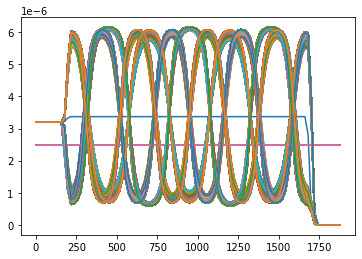

In [16]:
#Visualizing the sld curves
for x in range(new_sld_arr.shape[0]):
  plt.plot(new_sld_arr[x][0], new_sld_arr[x][1])
plt.show()

In [17]:
#Normalizing the sld curves by min/max

#First finding the min/max
x_val=new_sld_arr[:,0,:]
x_min = x_val.min()
x_max = x_val.max()
print('x-range = ', x_min, ' to ',x_max)
y_val=new_sld_arr[:,1,:]
y_min = y_val.min()
y_max = y_val.max()
print('y-range = ', y_min, ' to ',y_max)


x-range =  0.0  to  1879.92
y-range =  -1.35521e-26  to  6.1515e-06


In [18]:
#Normalize
new_sld_arr[:,0,:] = (new_sld_arr[:,0,:] - x_min)/(x_max - x_min)
new_sld_arr[:,1,:] = (new_sld_arr[:,1,:] - y_min)/(y_max - y_min)

In [19]:
#Checking that the curves are normalized
new_sld_arr.max(), new_sld_arr.min()

(1.0, 0.0)

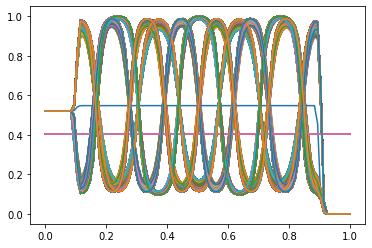

In [26]:
#Visualizing the normalized sld curves
for x in range(new_sld_arr.shape[0]):
  plt.plot(new_sld_arr[x][0], new_sld_arr[x][1])
plt.show()

In [20]:
#Saving the numpy arrays on my google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
!cd /content/drive/MyDrive/neutron_reflectivity/

In [22]:
np.save('sld_fp49.npy',new_sld_arr)
np.save('params_fp49.npy',new_params_arr)

In [23]:
new_sld_arr.shape, new_params_arr.shape

((5942, 2, 96), (5942, 3))

In [24]:
!mv sld_fp49.npy /content/drive/MyDrive/neutron_reflectivity/
!mv params_fp49.npy /content/drive/MyDrive/neutron_reflectivity/

In [25]:
!ls /content/drive/MyDrive/neutron_reflectivity/

df_encoded_samples.pkl	params_fp49.npy     test_latent_var.pt
mlp_test_dataset.pth	params_new.npy	    train_labels_var.pt
mlp_test_loader.pth	sld_fp34.npy	    train_latent_var.pt
mlp_train_loader.pth	sld_fp49.npy	    valid_labels_var.pt
mlp_valid_loader.pth	sld_new.npy	    valid_latent_var.pt
params_fp34.npy		test_labels_var.pt
